In [19]:
import os
import glob
import sys
import pandas as pd
import numpy as np
# plotting modules
import matplotlib as mpl
mpl.use('nbagg')
import seaborn as sns
import pylab as pl
# import some custom funcs|
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import utils as util
import behavior as butil

import importlib

In [20]:
%matplotlib notebook

In [21]:
util.set_sns_style(style='dark') # plotting settings i like for Nbs

In [81]:
# Set rootdir - I usually set this to the parent dir of all the data
rootdir = '/Users/julianarhee/Library/CloudStorage/GoogleDrive-edge.tracking.ru@gmail.com\
/My Drive/Edge_Tracking/Data'

# Specify experiment to analyze
# experiment = 'stripgrid_hdc-sytGCaMP7f_2p/20221102' 
# experiment = 'HDC_inhibition_CM' 

experiment = 'Noelle PAM Orco expts/Orco activation light strip'
src_dir = os.path.join(rootdir, experiment)

# Create a save dir for figures wherever you want
# I create a separate dir since I don't want to mess with Andy's existing organization
save_dir = '/Users/julianarhee/Documents/rutalab/data/figures/{}'.format(experiment)
save_dir = save_dir.replace(" ", "")
print("Saving figures to:{}    {}".format('\n', save_dir))
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Create a label/ID for figures so you always know where the plotted data came from
fig_id = src_dir.split('/My Drive')[1] #, experiment) 

Saving figures to:
    /Users/julianarhee/Documents/rutalab/data/figures/NoellePAMOrcoexpts/Orcoactivationlightstrip


In [82]:
# get a list of all the data files
#fly='Fly1'
log_files = sorted([k for k in glob.glob(os.path.join(src_dir, '1111*.log'))\
                if 'lossed tracking' not in k], key=util.natsort)
print("Found {} tracking files.".format(len(log_files)))
for i, fn in enumerate(log_files):
    print("{}: {}".format(i, os.path.split(fn)[-1]))

Found 6 tracking files.
0: 11112022-094503_Orco_activation_light_strip.log
1: 11112022-104610_Orco_activation_light_strip.log
2: 11112022-110246_Orco_activation_light_strip.log
3: 11112022-122209_Orco_activation_light_strip.log
4: 11112022-131059_Orco_activation_light_strip.log
5: 11112022-132150_Orco_activation_light_strip.log


In [28]:
file_ix = -3 # select a file
fpath = log_files[file_ix]
print("Selected: {}".format(fpath))

Selected: /Users/julianarhee/Library/CloudStorage/GoogleDrive-edge.tracking.ru@gmail.com/My Drive/Edge_Tracking/Data/Noelle PAM Orco expts/Orco activation light strip/11112022-132150_Orco_activation_light_strip.log


11112022-132150_Orco_activation_light_strip False


<IPython.core.display.Javascript object>


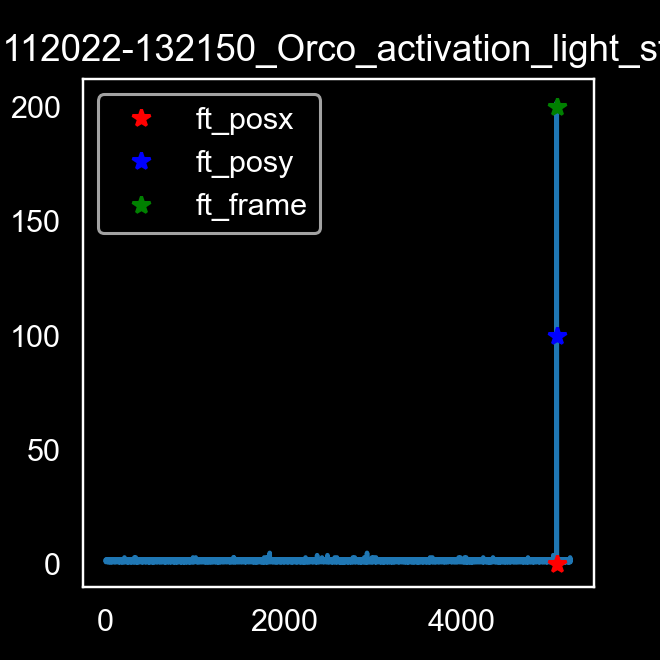

Removing 158 of 5220 samples.
--> found wonky FTs, check: /Users/julianarhee/Library/CloudStorage/GoogleDrive-edge.tracking.ru@gmail.com/My Drive/Edge_Tracking/Data/Noelle PAM Orco expts/Orco activation light strip/11112022-132150_Orco_activation_light_strip.log


,timestamp -- motor_step_command,mfc1_stpt,mfc2_stpt,mfc3_stpt,led1_stpt,led2_stpt,sig_status,ft_posx,ft_posy,ft_frame,...,strip_thresh,filename,fpath,timestamp,motor_step_command,time,rel_time,date,strip_type,led_on
0,11/11/2022-13:21:50.317676 -- 799999,0.4,0.0,0.0,1.0,0.0,0,0.009619,0.001896,32,...,NaN,11112022-132150_Orco_activation_light_strip,/Users/julianarhee/Library/CloudStorage/Google...,11/11/2022-13:21:50.317676,799999,1.668191e+09,0.000000,20221111,constant,False
1,11/11/2022-13:21:50.348744 -- 799999,0.4,0.0,0.0,1.0,0.0,0,0.009566,0.001194,34,...,NaN,11112022-132150_Orco_activation_light_strip,/Users/julianarhee/Library/CloudStorage/Google...,11/11/2022-13:21:50.348744,799999,1.668191e+09,0.031068,20221111,constant,False
2,11/11/2022-13:21:50.366711 -- 799999,0.4,0.0,0.0,1.0,0.0,0,0.009497,0.001570,35,...,NaN,11112022-132150_Orco_activation_light_strip,/Users/julianarhee/Library/CloudStorage/Google...,11/11/2022-13:21:50.366711,799999,1.668191e+09,0.049035,20221111,constant,False
3,11/11/2022-13:21:50.399295 -- 799999,0.4,0.0,0.0,1.0,0.0,0,0.009286,0.002124,37,...,NaN,11112022-132150_Orco_activation_light_strip,/Users/julianarhee/Library/CloudStorage/Google...,11/11/2022-13:21:50.399295,799999,1.668191e+09,0.081619,20221111,constant,False
4,11/11/2022-13:21:50.430752 -- 799999,0.4,0.0,0.0,1.0,0.0,0,0.008290,0.001226,39,...,NaN,11112022-132150_Orco_activation_light_strip,/Users/julianarhee/Library/CloudStorage/Google...,11/11/2022-13:21:50.430752,799999,1.668191e+09,0.113076,20221111,constant,False


In [30]:
# try to parse experiment details from the filename
# exp, datestr, fid, cond = butil.parse_info_from_file(fpath)
# load and process the csv data  
df0 = butil.load_dataframe(fpath, mfc_id=None, parse_filename=False, verbose=False, cond=None)
# print('Experiment: {}{}Fly ID: {}{}Condition: {}'.format(exp, '\n', fid, '\n', cond))
#fly_id = df0['fly_id'].unique()[0]
df0.head()

In [32]:
df0.shape

(5062, 27)

In [33]:
# get experimentally determined odor boundaries:
strip_width=50
strip_sep=200 # only matters for 2p
# ogrid = butil.get_odor_grid(df0, 
#                             strip_width=strip_width, strip_sep=strip_sep,
#                             use_crossings=True, verbose=False)
# (odor_xmin, odor_xmax), = ogrid.values()
# print(ogrid)

<IPython.core.display.Javascript object>


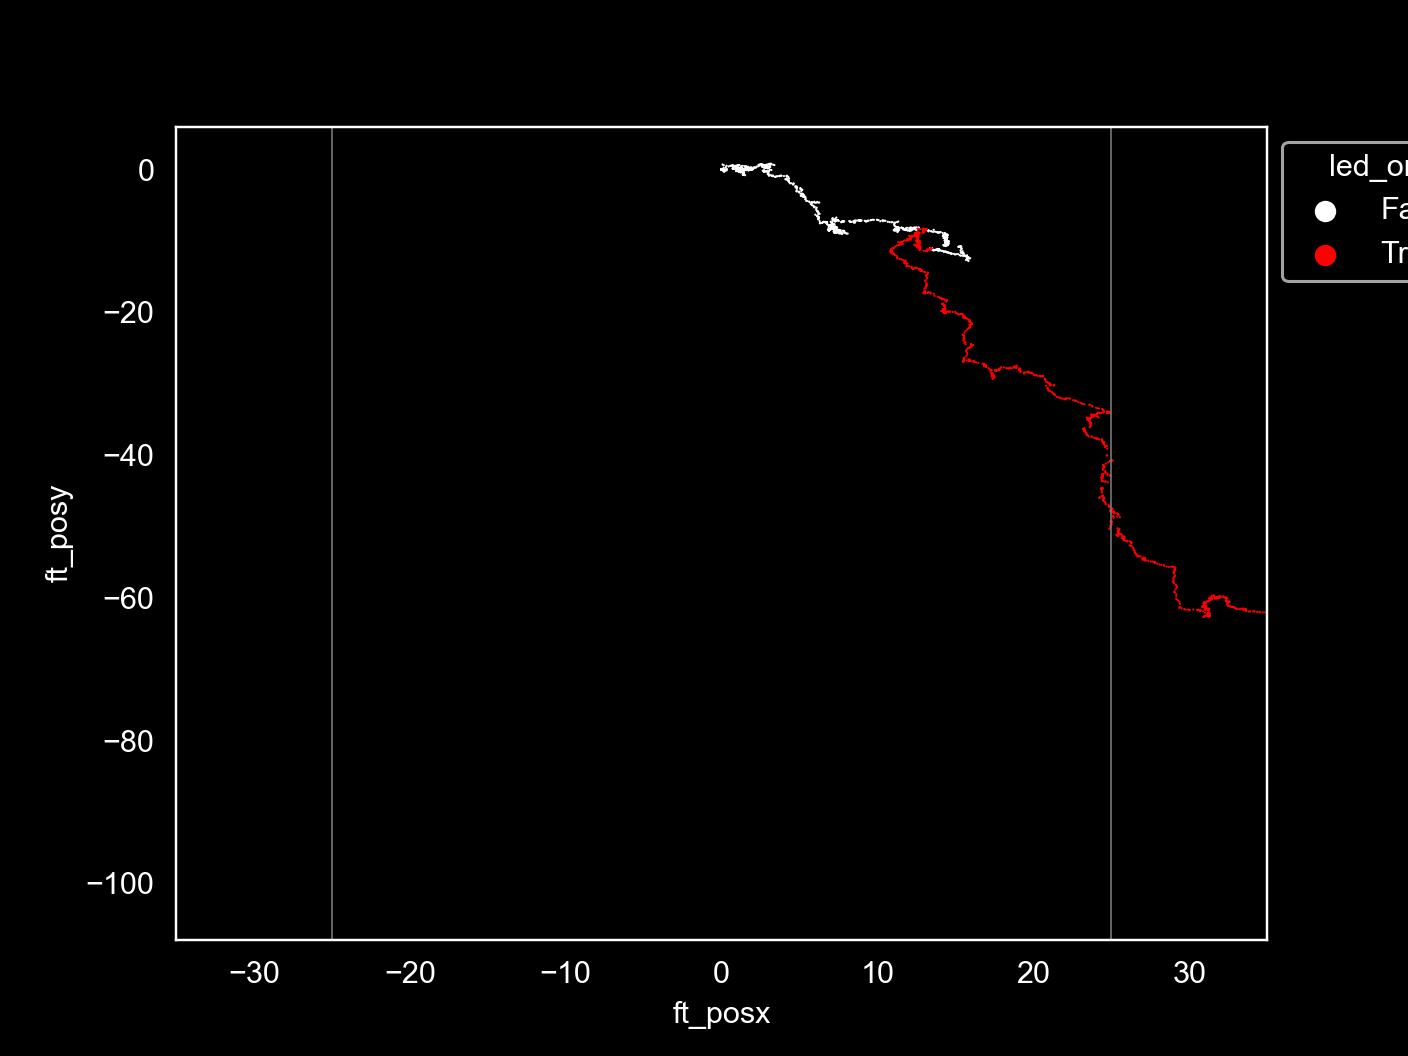

NameError: name 'fly_id' is not defined

In [34]:
# Set some plotting params 
hue_varname='led_on'
palette={True: 'r', False: 'w'}
start_at_odor = True
strip_width=10
odor_lc='lightgray'
odor_lw=0.5
odor_xmin=-25
odor_xmax=25
# ---------------------------------------------------------------------
fig, ax = pl.subplots()
sns.scatterplot(data=df0, x="ft_posx", y="ft_posy", ax=ax, 
                hue=hue_varname, s=0.5, edgecolor='none', palette=palette)
butil.plot_odor_corridor(ax, odor_xmin=odor_xmin, odor_xmax=odor_xmax)
ax.legend(bbox_to_anchor=(1,1), loc='upper left', title=hue_varname)
ax.set_title(fly_id)
pl.subplots_adjust(left=0.2, right=0.8)
# Center corridor
xmax = np.ceil(df0['ft_posx'].abs().max())
ax.set_xlim([-xmax-10, xmax+10])
# label figure and save
util.label_figure(fig, fig_id)
figname = 'trajectory_{}'.format(fly_id)
pl.savefig(os.path.join(save_dir, '{}.png'.format(figname))) #, dpi=dpi)
print(os.path.join(save_dir, '{}.png'.format(figname)))